<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/21a_%EA%B0%84%EB%9E%B5_Titanic_%EC%83%9D%EC%A1%B4%EC%9E%90%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pip install jupyter  
터미널 창에 jupyter-notebook  
주피터 웹브라우저 - 우측상단 - New - Python3

In [ ]:
import pandas as pd
import os

In [ ]:
os.environ['KAGGLE_USERNAME']='mjkimcs'
os.environ['KAGGLE_KEY']='47adf959b8d9d52a7332fb2dff639854'

In [ ]:
!kaggle competitions download -c titanic
!unzip '*.zip'

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 20.4MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 46.9MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.31MB/s]
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.shape # 891명, 12개의 feature

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # pip install seaborn

In [ ]:
def bar_chart(feature):
    survived = train.loc[train['Survived']==1, feature].value_counts() # 시리즈형
    dead = train.loc[train['Survived']==0, feature].value_counts() # 시리즈형
    
    df = pd.DataFrame([survived, dead], index=['Survived', 'Dead']) # [survived, dead] : 리스트형
    df.plot(kind='bar', figsize=(15,10))
    plt.show()

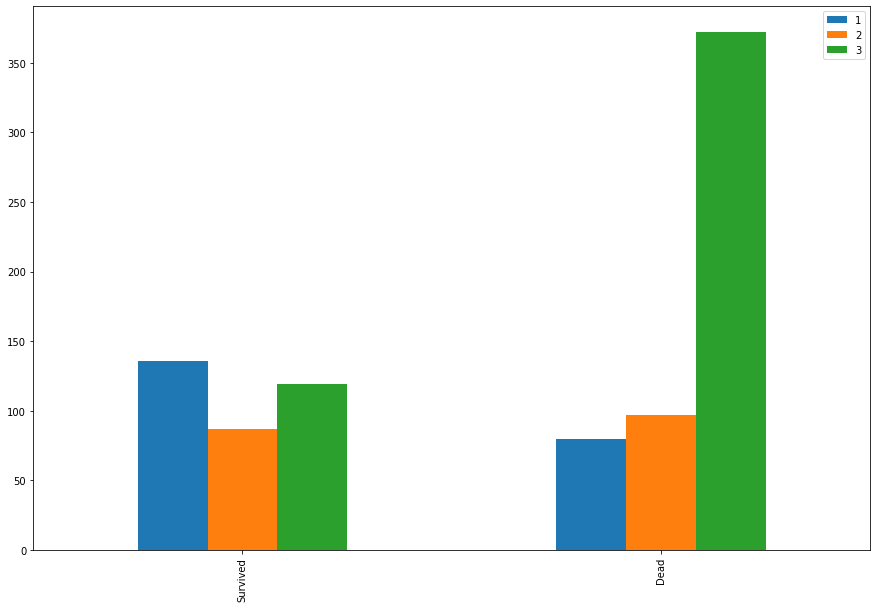

In [ ]:
# 자리 등급에 따른 생존/사망자 확인
bar_chart("Pclass")

In [ ]:
dead = train.loc[train['Survived']==0, 'Pclass'].value_counts()
dead

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [ ]:
type(dead)

pandas.core.series.Series

In [ ]:
survived = train.loc[train['Survived']==1, ["Pclass"]].value_counts()
survived

Pclass
1         136
3         119
2          87
dtype: int64

In [ ]:
type(survived)

pandas.core.series.Series

In [ ]:
type([survived,dead])

list

In [ ]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [ ]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [ ]:
train['Fare'].max()

512.3292

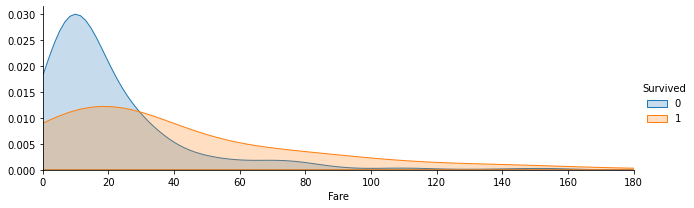

In [ ]:
# 요금에 따른 생존/사망자 확인
fg = sns.FacetGrid(train, hue="Survived",aspect=3)
fg.map(sns.kdeplot,'Fare',shade= True)
fg.set( xlim=(0, train['Fare'].max()) )
fg.add_legend()
plt.xlim(0, 180)
plt.show()

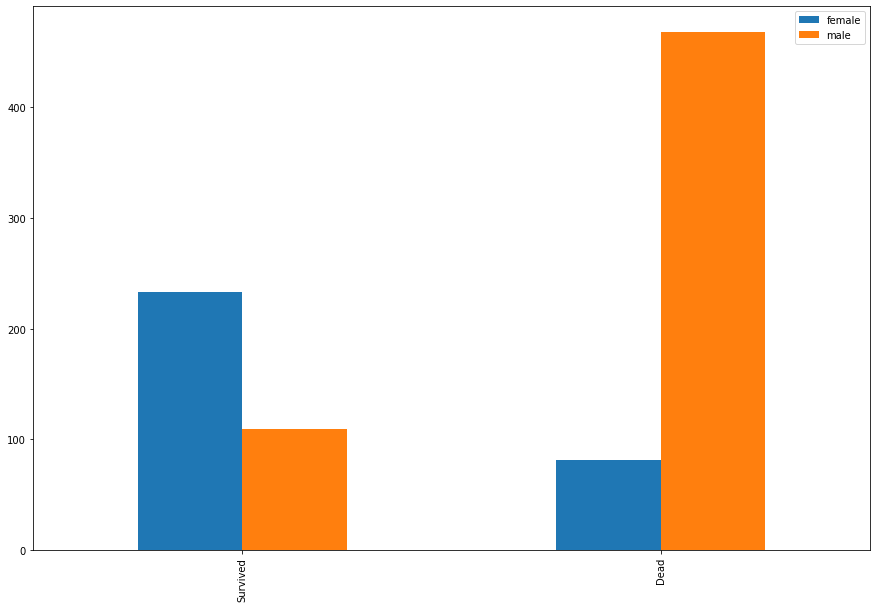

In [ ]:
# 성별에 따른 생존/사망자 확인
bar_chart('Sex')

In [ ]:
train['Age'].max()

80.0

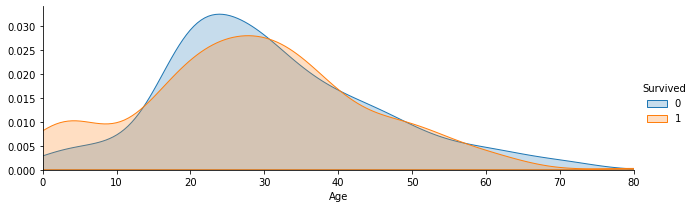

In [ ]:
# 나이에 따른 생존/사망자 확인
fg = sns.FacetGrid(train, hue="Survived",aspect=3)
fg.map(sns.kdeplot,'Age',shade= True)
fg.set( xlim=(0, train['Age'].max()) )
fg.add_legend()
# plt.xlim(0,80)
plt.show()

In [ ]:
train_test_data= [train, test]
train_test_data

[     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
 0              1         0       3  ...   7.2500   NaN         S
 1              2         1       1  ...  71.2833   C85         C
 2              3         1       3  ...   7.9250   NaN         S
 3              4         1       1  ...  53.1000  C123         S
 4              5         0       3  ...   8.0500   NaN         S
 ..           ...       ...     ...  ...      ...   ...       ...
 886          887         0       2  ...  13.0000   NaN         S
 887          888         1       1  ...  30.0000   B42         S
 888          889         0       3  ...  23.4500   NaN         S
 889          890         1       1  ...  30.0000  C148         C
 890          891         0       3  ...   7.7500   NaN         Q
 
 [891 rows x 12 columns],      PassengerId  Pclass  ... Cabin Embarked
 0            892       3  ...   NaN        Q
 1            893       3  ...   NaN        S
 2            894       2  ...   NaN       

In [ ]:
# 이름 데이터 가공

# Mr    : 0
# Miss  : 1
# Mrs   : 2
# 그 외 : 3

train_test_data= [train, test] 
for i in train_test_data:
    i['Title'] = i['Name'].str.extract('([A-Za-z]+)\.', expand=False)

title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", 
                 "Master": "etc", "Dr": "etc", "Rev": "etc", "Col": "etc", "Major": "etc", "Mlle": "etc","Countess": "etc",
                 "Ms": "etc", "Lady": "etc", "Jonkheer": "etc", "Don": "etc", "Dona" : "etc", "Mme": "etc","Capt": "etc","Sir": "etc" }

for i in train_test_data:
    i['Title'] = i['Title'].map(title_mapping)
    
# 이름 열은 날려버리기
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

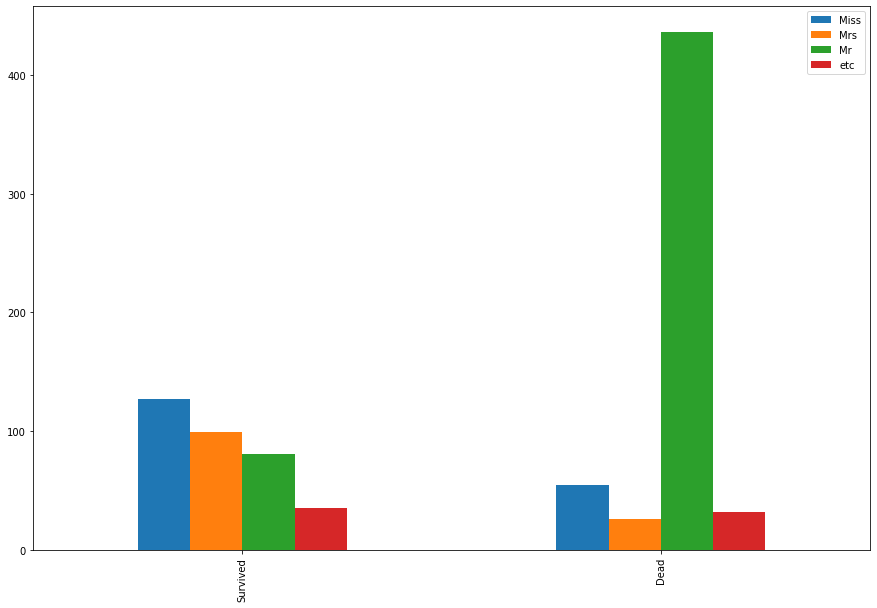

In [ ]:
# 이름(타이틀)에 따른 생존/사망자 확인
bar_chart('Title')

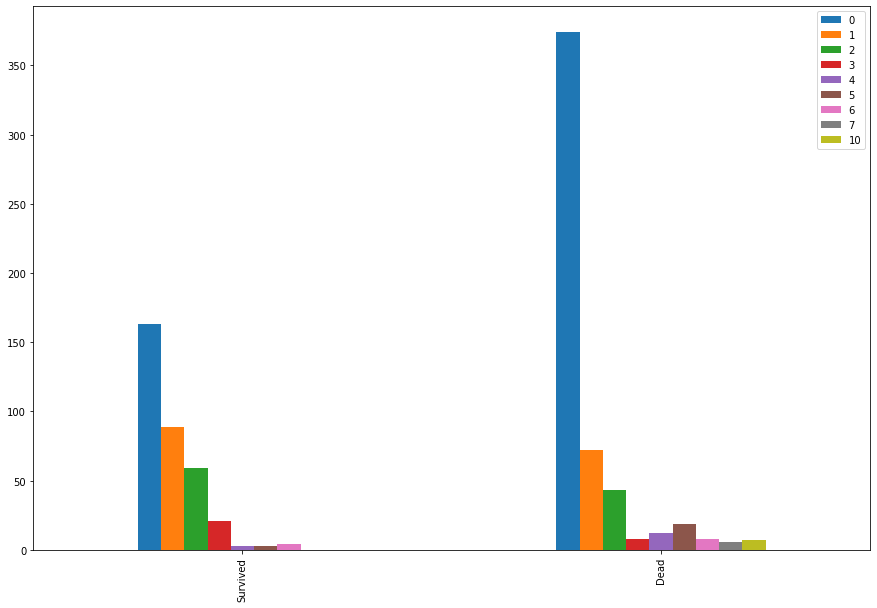

In [ ]:
# 동행한 가족의 수에 따른 생존/사망자 확인
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]

train.drop('SibSp', axis=1, inplace=True)
test.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)

bar_chart('FamilySize')

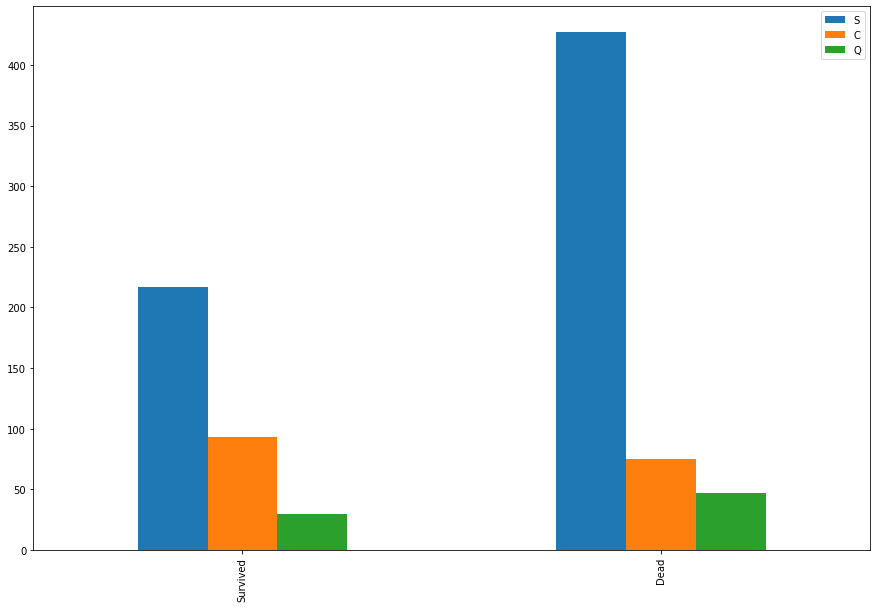

In [ ]:
# 선착장에 따른 생존/사망자 확인
bar_chart('Embarked')

In [ ]:
# 관련이 없는 Feature들은 삭제 (티켓 번호, 사물함 번호, 승객 ID)
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

test_PassengerId = test["PassengerId"]
train.drop('PassengerId', axis = 1, inplace=True)
test.drop('PassengerId', axis = 1, inplace=True)

# for i in train_test_data:
#     i.drop('Ticket', axis=1, inplace=True)

In [ ]:
test_PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
type(test_PassengerId)

pandas.core.series.Series

In [ ]:
# "Age" 결측치 처리
# 그룹별로 평균내서, 결측치 채우기

train["Age"].fillna( train.groupby("Title")["Age"].transform("median"), inplace=True )
test["Age"].fillna( test.groupby("Title")["Age"].transform("median"), inplace=True )

In [ ]:
# "Fare" 결측치 처리
# 그룹별로 평균내서, 결측치 채우기

train["Fare"].fillna( train.groupby("Pclass")["Fare"].transform("median"), inplace=True )
test["Fare"].fillna( test.groupby("Pclass")["Fare"].transform("median"), inplace=True )

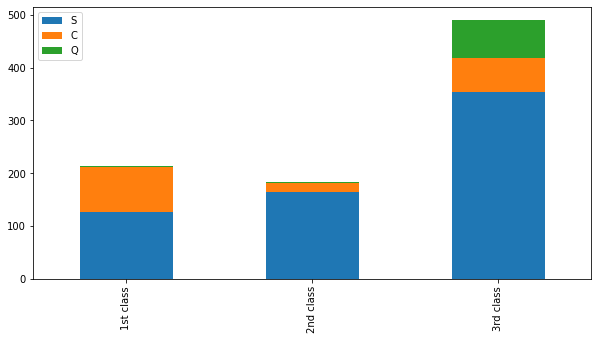

In [ ]:
# "Embarked" 결측치 처리 (1)

Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3], index=['1st class','2nd class', '3rd class'])
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.show()

In [ ]:
# "Embarked" 결측치 처리 (2)
# S선착장이 모두 50%이상이므로 NaN을 모두 S로 채움

train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Title       891 non-null    object 
 7   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Embarked    418 non-null    object 
 5   Title       418 non-null    object 
 6   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 23.0+ KB


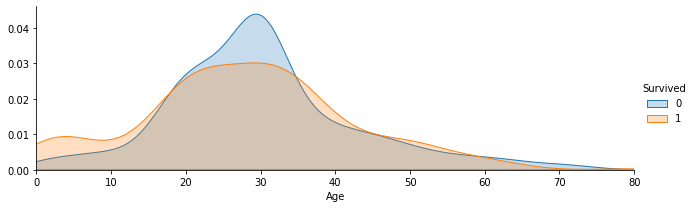

In [ ]:
# "Age" 구간화 (binning) (1)
fg = sns.FacetGrid(train, hue="Survived",aspect=3)
fg.map(sns.kdeplot,'Age',shade= True)
fg.set(xlim=(0, train['Age'].max()))
fg.add_legend()
plt.show()

In [ ]:
# "Age" 구간화 (binning) (2)

#청소년: 0
#청년  : 1
#장년  : 2
#중년  : 3
#노년  : 4

for i in train_test_data:
    i.loc[ i['Age'] <= 16, 'Age'] = 0
    i.loc[(i['Age'] > 16) & (i['Age'] <= 26), 'Age'] = 1
    i.loc[(i['Age'] > 26) & (i['Age'] <= 36), 'Age'] = 2
    i.loc[(i['Age'] > 36) & (i['Age'] <= 62), 'Age'] = 3
    i.loc[ i['Age'] > 62, 'Age'] = 4

In [ ]:
train['Fare'].max()

512.3292

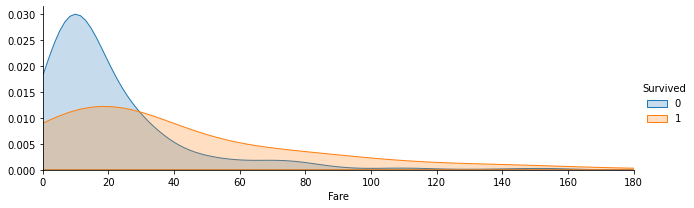

In [ ]:
# "Fare" 구간화 (binning) (1)
fg = sns.FacetGrid(train, hue="Survived",aspect=3)
fg.map(sns.kdeplot,'Fare',shade= True)
fg.set(xlim=(0, train['Fare'].max()))
fg.add_legend()
plt.xlim(0,180)
plt.show()

In [ ]:
# "Fare" 구간화 (binning) (2)

# very low cost : 0
# low cost      : 1
# normal cost   : 2
# high cost     : 3
# very high cost: 4

for i in train_test_data:
    i.loc[ i['Fare'] <= 17, 'Fare'] = 0
    i.loc[(i['Fare'] > 17) & (i['Fare'] <= 30), 'Fare'] = 1
    i.loc[(i['Fare'] > 30) & (i['Fare'] <= 100), 'Fare'] = 2
    i.loc[(i['Fare'] > 100) & (i['Fare'] <= 180), 'Fare'] = 3
    i.loc[ i['Fare'] > 180, 'Fare'] = 4

In [ ]:
# 성별을 숫자로 맵핑
sex_mapping = {"male": 0, "female": 1}
for i in train_test_data:
    i['Sex'] = i['Sex'].map(sex_mapping)

In [ ]:
# 선착장을 숫자로 맵핑
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for i in train_test_data:
    i['Embarked'] = i['Embarked'].map(embarked_mapping)

In [ ]:
# 이름을 숫자로 맵핑
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "etc": 3}
for i in train_test_data:
    i['Title'] = i['Title'].map(title_mapping)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,0,0,1
1,1,1,1,3.0,2.0,1,2,1
2,1,3,1,1.0,0.0,0,1,0
3,1,1,1,2.0,2.0,0,2,1
4,0,3,0,2.0,0.0,0,0,0


In [ ]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2,0,0
1,3,1,3.0,0.0,0,2,1
2,2,0,3.0,0.0,2,0,0
3,3,0,2.0,0.0,0,0,0
4,3,1,1.0,0.0,0,2,2


In [ ]:
train_x = train.drop('Survived', axis=1)
train_y = train['Survived']

In [ ]:
# 어떤 알고리즘이 가장 성능이 좋은지 테스트 (1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K_fold cross validation 준비, 10 개 구역으로 나누기
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
# 어떤 알고리즘이 가장 성능이 좋은지 테스트 (2)
# train 데이터를 대략 7:3으로 랜덤으로 10번 나눠서 각각 테스트 해보기

# KNN
clf = KNeighborsClassifier(n_neighbors = 5)
score_KNN = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

# 의사결정 나무
clf = DecisionTreeClassifier()
score_DT = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

# 랜덤 포레스트
clf = RandomForestClassifier(n_estimators=10)
score_RF = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

# SVM
clf = svm.SVC(gamma='auto')
score_SVC = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

In [ ]:
# 각 모델의 평균 정확도 확인

print("KNN           :", round(np.mean(score_KNN)*100, 2))
print("의사결정 나무 :", round(np.mean(score_DT)*100, 2))
print("랜덤 포레스트 :", round(np.mean(score_RF)*100, 2))
print("SVM           :", round(np.mean(score_SVC)*100, 2))

KNN           : 81.03
의사결정 나무 : 80.59
랜덤 포레스트 : 80.25
SVM           : 82.83


In [ ]:
# SVM모델을 사용하여 test 데이터에 있는 승객들의 생존여부 예측

clf = svm.SVC(gamma='auto')
clf.fit(train_x, train_y)

prediction = clf.predict(test)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_PassengerId,
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
